# Soja 1ra - serie siembra, cosecha, producción, rendimiento

Serie de datos de soja 1ra sobre la superficie sembrada, cosechada, producción y rendimiento, por provincia y departamento desde 2000. La campaña se indica con el año de inicio (2000 = 2000/2001) hasta 2019/2020.

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn
import statsmodels.formula.api as smf


from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [310]:
data = pd.read_csv("../MisTrabajos/Datasets/soja-1ra-serie-2000-2019.csv",encoding='latin-1')

data.head()

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
0,soja 1ra,2000,2000/01,Buenos Aires,6,Adolfo Alsina,6007.0,19800,19800,32900,1662
1,soja 1ra,2000,2000/01,Buenos Aires,6,Adolfo Gonzales Chaves,6014.0,19500,19500,27300,1400
2,soja 1ra,2000,2000/01,Buenos Aires,6,Alberti,6021.0,9000,7200,20200,2806
3,soja 1ra,2000,2000/01,Buenos Aires,6,Ayacucho,6042.0,1500,1450,2200,1517
4,soja 1ra,2000,2000/01,Buenos Aires,6,Azul,6049.0,39000,38200,70700,1851


In [311]:
data.shape , data.columns

((5075, 11),
 Index(['cultivo_nombre', 'anio', 'campania', 'provincia_nombre',
        'provincia_id', 'departamento_nombre', 'departamento_id',
        'superficie_sembrada_ha', 'superficie_cosechada_ha', 'produccion_tm',
        'rendimiento_kgxha'],
       dtype='object'))

* produccion_tm = Produccion en toneladas
* superficie_sembrada_ha = Superficie sembrada en hectáreas. 
* superficie_cosechada_ha = Superficie cosechada en hectáreas. 
* rendimiento_kgxha = Rendimiento en kilos por hectárea. 


In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cultivo_nombre           5075 non-null   object 
 1   anio                     5075 non-null   int64  
 2   campania                 5075 non-null   object 
 3   provincia_nombre         5075 non-null   object 
 4   provincia_id             5075 non-null   int64  
 5   departamento_nombre      5075 non-null   object 
 6   departamento_id          5032 non-null   float64
 7   superficie_sembrada_ha   5075 non-null   int64  
 8   superficie_cosechada_ha  5075 non-null   int64  
 9   produccion_tm            5075 non-null   object 
 10  rendimiento_kgxha        5075 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 436.3+ KB


Vemos que algunos datos estan en modo OBJECT cuando son numeros enteros, por eso tendremos que pasarlos 

In [313]:
data.isna().sum()

cultivo_nombre              0
anio                        0
campania                    0
provincia_nombre            0
provincia_id                0
departamento_nombre         0
departamento_id            43
superficie_sembrada_ha      0
superficie_cosechada_ha     0
produccion_tm               0
rendimiento_kgxha           0
dtype: int64

Tenemos algunos datos faltantes en el numero de los Departamentos.

In [314]:
#TENDREMOS QUE REEMPLAZAR LOS DATOS NULOS QUE APARCEN EN SD

data = data.replace('SD', "0")
data[347:352]

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
347,soja 1ra,2001,2001/02,Corrientes,18,Esquina,18049.0,2065,1500,1300,867
348,soja 1ra,2001,2001/02,Corrientes,18,Ituzaingó,18084.0,270,270,500,1852
349,soja 1ra,2001,2001/02,Corrientes,18,Lavalle,18091.0,50,25,0,0
350,soja 1ra,2001,2001/02,Corrientes,18,Monte Caseros,18112.0,150,135,200,1481
351,soja 1ra,2001,2001/02,Corrientes,18,San Martín,18147.0,80,80,100,1250


Vemos que en vez de tener Nan/0 , tienen por escrito "SD" por eso decia que era string y no un int

In [315]:
data["rendimiento_kgxha"]= data["rendimiento_kgxha"].astype(int)
data["produccion_tm"]= data["produccion_tm"].astype(int)

data[347:352]

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
347,soja 1ra,2001,2001/02,Corrientes,18,Esquina,18049.0,2065,1500,1300,867
348,soja 1ra,2001,2001/02,Corrientes,18,Ituzaingó,18084.0,270,270,500,1852
349,soja 1ra,2001,2001/02,Corrientes,18,Lavalle,18091.0,50,25,0,0
350,soja 1ra,2001,2001/02,Corrientes,18,Monte Caseros,18112.0,150,135,200,1481
351,soja 1ra,2001,2001/02,Corrientes,18,San Martín,18147.0,80,80,100,1250


In [316]:
data.describe()

,anio,provincia_id,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
count,5075.000000,5075.000000,5032.000000,5075.000000,5075.000000,5.075000e+03,5075.000000
mean,2009.853793,33.352906,33461.448529,52120.994286,50767.592118,1.455313e+05,2537.717833
std,5.673232,30.979805,30895.228508,82939.191986,81624.881571,2.565755e+05,857.881703
min,2000.000000,6.000000,6007.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2005.000000,6.000000,6602.000000,3400.000000,3159.500000,6.720000e+03,2000.000000
50%,2010.000000,22.000000,22017.500000,23000.000000,22000.000000,4.900000e+04,2591.000000
75%,2015.000000,66.000000,66042.000000,65000.000000,63535.000000,1.686915e+05,3100.000000
max,2019.000000,90.000000,90119.000000,859273.000000,850273.000000,2.550819e+06,7253.000000


## Dividimos en 4 grupos el rendimiento de KG X HA

In [317]:
data.loc[:,"grupos_kgxha"] = "0-8000"
data.loc[data["rendimiento_kgxha"]<=2000,"grupos_kgxha"] = "0-2000"
data.loc[(data["rendimiento_kgxha"]>2000)&(data["rendimiento_kgxha"]<=4000),"grupos_kgxha"] = "2000-4000"
data.loc[(data["rendimiento_kgxha"]>4000)&(data["rendimiento_kgxha"]<=6000),"grupos_kgxha"] = "4000-6000"
data.loc[(data["rendimiento_kgxha"]>6000)&(data["rendimiento_kgxha"]<=8000),"grupos_kgxha"] = "6000>"
data.head()

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha,grupos_kgxha
0,soja 1ra,2000,2000/01,Buenos Aires,6,Adolfo Alsina,6007.0,19800,19800,32900,1662,0-2000
1,soja 1ra,2000,2000/01,Buenos Aires,6,Adolfo Gonzales Chaves,6014.0,19500,19500,27300,1400,0-2000
2,soja 1ra,2000,2000/01,Buenos Aires,6,Alberti,6021.0,9000,7200,20200,2806,2000-4000
3,soja 1ra,2000,2000/01,Buenos Aires,6,Ayacucho,6042.0,1500,1450,2200,1517,0-2000
4,soja 1ra,2000,2000/01,Buenos Aires,6,Azul,6049.0,39000,38200,70700,1851,0-2000


In [318]:
dummy_grupo = pd.get_dummies(data["grupos_kgxha"], prefix="grupos")

grupos_0-2000       1391
grupos_2000-4000    3504
grupos_4000-6000     179
grupos_6000>           1
dtype: int64

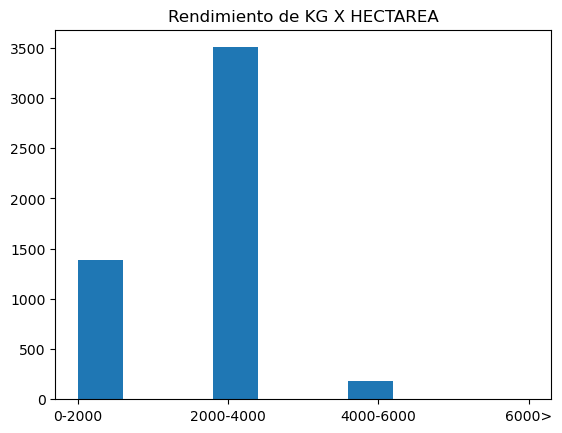

In [319]:
plt.hist(data["grupos_kgxha"])
plt.title("Rendimiento de KG X HECTAREA")
dummy_grupo.sum()

* Podemos observar que el grupo mas grande de RENDIMIENTO DE KG X HECTAREA es entre 2000 y 4000. Casi el 70% del rendimiento en general.

In [320]:
data1 = data[(data["superficie_sembrada_ha"]>800000)]
data1

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha,grupos_kgxha
3873,soja 1ra,2015,2015/16,Córdoba,14,Río Cuarto,14098.0,859273,850273,2550819,3000,2000-4000


* Podemos ver que la media de Superficie cosechada en hectáreas es 50767 y el pico maximo fue de 850273 en **RIO CUARTO - Cordoba - 2015/16**


* La media de la Superficie sembrada en hectáreas es de 52121 y su pico maximo es de 859273 en **RIO CUARTO - Cordoba - 2015/16**

In [321]:
data5 = data[(data["rendimiento_kgxha"]>4900)]
data5.head()

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha,grupos_kgxha
3167,soja 1ra,2012,2012/13,Santa Fe,82,Rosario,82084.0,33100,35100,254580,7253,6000>
4550,soja 1ra,2018,2018/19,Buenos Aires,6,Colón,6175.0,34888,34888,174440,5000,4000-6000
4599,soja 1ra,2018,2018/19,Buenos Aires,6,Pergamino,6623.0,115852,115852,579260,5000,4000-6000
4611,soja 1ra,2018,2018/19,Buenos Aires,6,Salto,6714.0,72167,72167,360835,5000,4000-6000


* El mayor rendimiento de KG por HECTAREA fue de 7253 y se produjo en **ROSARIO - santa fe - 2012/13** 

array([[<AxesSubplot:title={'center':'anio'}>,
        <AxesSubplot:title={'center':'provincia_id'}>,
        <AxesSubplot:title={'center':'departamento_id'}>],
       [<AxesSubplot:title={'center':'superficie_sembrada_ha'}>,
        <AxesSubplot:title={'center':'superficie_cosechada_ha'}>,
        <AxesSubplot:title={'center':'produccion_tm'}>],
       [<AxesSubplot:title={'center':'rendimiento_kgxha'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

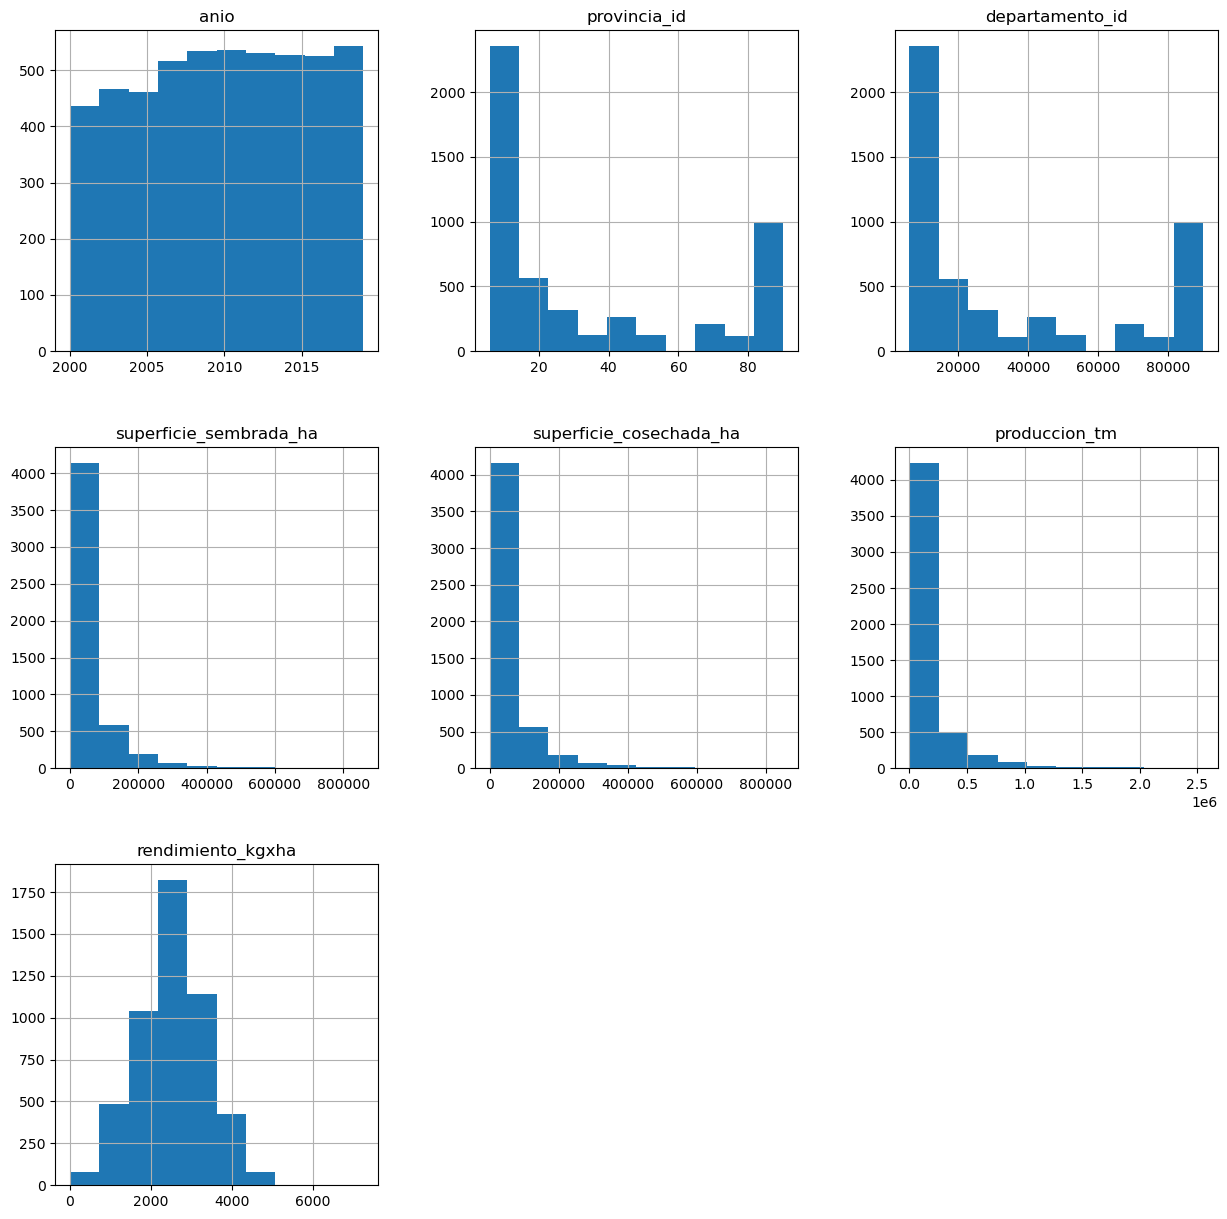

In [322]:
data.hist(figsize=(15, 15))

In [323]:
data.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_14804\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,anio,provincia_id,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
anio,1.000000,0.073807,0.080358,0.034042,0.031243,0.057624,0.228276
provincia_id,0.073807,1.000000,0.999979,0.007009,0.004291,0.004427,-0.124259
departamento_id,0.080358,0.999979,1.000000,0.005051,0.002471,0.003653,-0.122060
superficie_sembrada_ha,0.034042,0.007009,0.005051,1.000000,0.998287,0.957816,0.227654
superficie_cosechada_ha,0.031243,0.004291,0.002471,0.998287,1.000000,0.961203,0.238498
produccion_tm,0.057624,0.004427,0.003653,0.957816,0.961203,1.000000,0.367176
rendimiento_kgxha,0.228276,-0.124259,-0.122060,0.227654,0.238498,0.367176,1.000000


### Correlacion entre los datos
* Lo que podemos observar es que la **produccion en toneladas** tiene una correlacion muy fuerte casi que excelente con **Superficie cosechada en hectareas** y tambien con la **Superficie sembrada en hectareas**


* Tambien podemos ver que la **Superficie cosecha en hecatreas** tiene una correlacion perfecta con **Superficie sembrada en hectareas** 


* Las correlaciones negativas son **Rendimiento en kilos por hectárea** con **Las provincias** y **Departamentos**

### Sacamos la distribucion normal del rendimiento_kgxha

In [324]:
media_rendimiento_kg = 2537
max_rendimiento_kg = 7253
std_rendimiento_kg = 857

zz = (max_rendimiento_kg - media_rendimiento_kg)
zz_div = zz / std_rendimiento_kg

print("la distribucion normal es = ",zz_div)
print("valor en la tabla de distribucion normal",0.999999981)
print("la probabilidad de el rendimiento_KGXHA sea menor a la MAXIMA trimestral es = %",99.99)
print("la probabilidad de que supere el rendimiento_KGXHA MAXIMO es = %",0.0001)

la distribucion normal es =  5.50291715285881
valor en la tabla de distribucion normal 0.999999981
la probabilidad de el rendimiento_KGXHA sea menor a la MAXIMA trimestral es = % 99.99
la probabilidad de que supere el rendimiento_KGXHA MAXIMO es = % 0.0001


In [325]:
data.corr()["produccion_tm"]

C:\Users\Acer\AppData\Local\Temp\ipykernel_14804\4222965382.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["produccion_tm"]


anio                       0.057624
provincia_id               0.004427
departamento_id            0.003653
superficie_sembrada_ha     0.957816
superficie_cosechada_ha    0.961203
produccion_tm              1.000000
rendimiento_kgxha          0.367176
Name: produccion_tm, dtype: float64

* LAS CORRELACIONES QUE TIENE LA PRODUCCION EN TONELADAS POR HECTAREA

Text(0.5, 1.0, 'PRODUCCION DE TMxHA & RENDIMIENTO KGxHA')

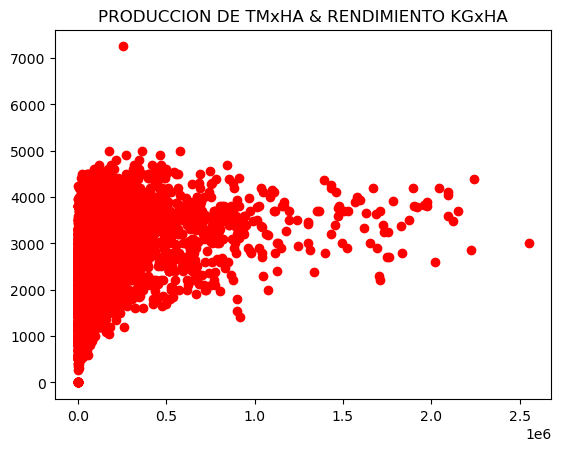

In [326]:
plt.plot(data["produccion_tm"], data["rendimiento_kgxha"],"ro")
plt.title("PRODUCCION DE TMxHA & RENDIMIENTO KGxHA")

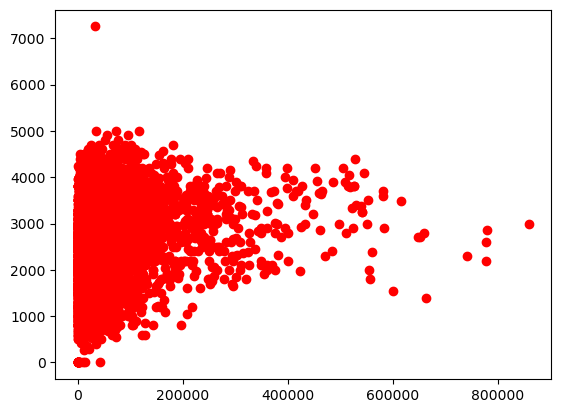

In [327]:
plt.plot(data["superficie_sembrada_ha"], data["rendimiento_kgxha"],"ro")

<AxesSubplot:title={'center':'superficie sembrada en hectareas'}, xlabel='produccion_tm', ylabel='superficie_sembrada_ha'>

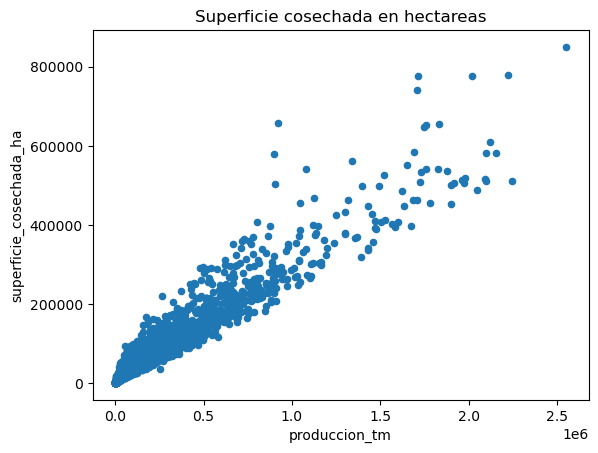

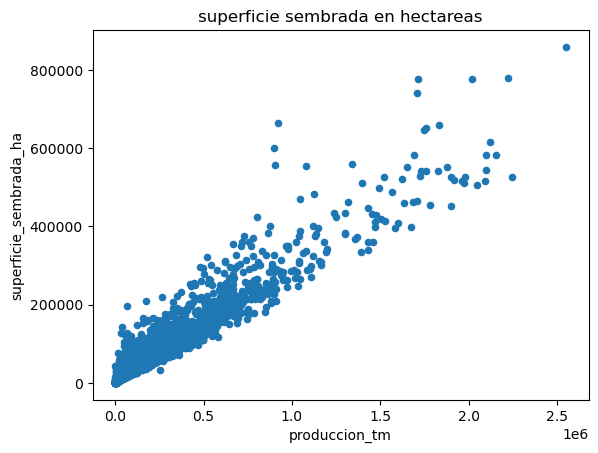

In [328]:
data.plot(kind="scatter" , x="produccion_tm", y="superficie_cosechada_ha",title="Superficie cosechada en hectareas")
data.plot(kind="scatter" , x="produccion_tm", y="superficie_sembrada_ha", title="superficie sembrada en hectareas")

In [329]:
produc = data["produccion_tm"]
train , test = train_test_split (data["produccion_tm"],  test_size=0.30)

produc = sklearn.utils.shuffle(produc)

len(train) , len(test)

(3552, 1523)

In [330]:
cut_id = int(0.80*len(produc))
train_data = produc[:cut_id]

test_data = produc[cut_id+1:]
test_data

C:\Users\Acer\AppData\Local\Temp\ipykernel_14804\3893132587.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_data = produc[:cut_id]
C:\Users\Acer\AppData\Local\Temp\ipykernel_14804\3893132587.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_data = produc[cut_id+1:]


2645     19000
700      11800
3443    156600
569     320000
2271     81000
         ...  
3739       912
4286     11250
2380      1400
1138     25129
500       2800
Name: produccion_tm, Length: 1014, dtype: int32

In [331]:
len(train_data),len(test_data)

(4060, 1014)

# Superficie Sembrada y Cosechada por Hectáreas

* PREDECIR CUANTO SE PUEDE COSECHAR EN (X) SEMBRADO POR HECTAREAS.(cuando la maxima sembrada fue 859,273 y la cosecha de 850,273 )

In [409]:
lm = smf.ols(formula="superficie_cosechada_ha~superficie_sembrada_ha",data=data).fit()
lm.params

Intercept                -439.572672
superficie_sembrada_ha      0.982467
dtype: float64

In [410]:
lm.rsquared_adj

0.9965756125535301

In [411]:
lm.pvalues

Intercept                 2.989765e-08
superficie_sembrada_ha    0.000000e+00
dtype: float64

In [412]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     superficie_cosechada_ha   R-squared:                       0.997
Model:                                 OLS   Adj. R-squared:                  0.997
Method:                      Least Squares   F-statistic:                 1.477e+06
Date:                     Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                             10:54:24   Log-Likelihood:                -50193.
No. Observations:                     5075   AIC:                         1.004e+05
Df Residuals:                         5073   BIC:                         1.004e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -439.5727     79.192     -5.551      0.000    -594.824    -284.322
superficie_sembrada_ha     0.9825      0.001   1215.176      0.000       0.981       0.984
==============================================================================
Omnibus:                     7710.581   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4077312.024
Skew:                          -9.381   Prob(JB):                         0.00
Kurtosis:                     140.586   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [413]:
sembrada_pre = lm.predict(pd.DataFrame(data["superficie_sembrada_ha"]))
sembrada_pre

0       19013.276928
1       18718.536782
2        8402.631691
3        1034.128055
4       37876.646237
            ...     
5070       51.660903
5071      -46.585812
5072     2704.322212
5073     -243.079242
5074     -292.202600
Length: 5075, dtype: float64

### Prediccion superficie sembrada por Hectáreas

Text(0.5, 1.0, 'VALOR ACTUAL vs PREDICCION')

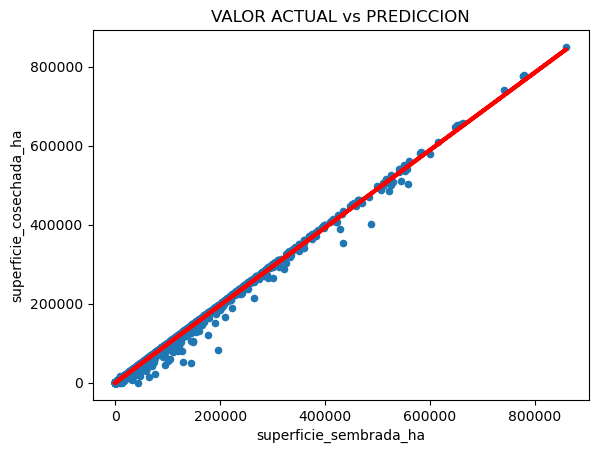

In [451]:
y_mean=np.mean(data["superficie_cosechada_ha"])

data.plot(kind = "scatter" , x="superficie_sembrada_ha", y="superficie_cosechada_ha")

plt.plot(pd.DataFrame(data["superficie_sembrada_ha"]), sembrada_pre, c="red", linewidth = 3)
plt.title("VALOR ACTUAL vs PREDICCION")


* **La línea roja es el modelo lineal que mejor se ajusta y que básicamente se ha obtenido en forma de modelo y los puntitos de color azul que estan dispersos alrededor del mismo son los datos originales que presentaba el Data Set.**

In [415]:
#añadimos la columna de las predicciones
data["sembrada_pre"] = -439.572672 + 0.982467 * data["superficie_sembrada_ha"]

#Añadimos una columna mas para los Errores standar residuales RSE
data["RSE"] = (data["superficie_sembrada_ha"] - data["sembrada_pre"])**2
data.head()

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha,grupos_kgxha,sembrada_pre,RSE
0,soja 1ra,2000,2000/01,Buenos Aires,6,Adolfo Alsina,6007.0,19800,19800,32900,1662,0-2000,19013.273928,6.189379e+05
1,soja 1ra,2000,2000/01,Buenos Aires,6,Adolfo Gonzales Chaves,6014.0,19500,19500,27300,1400,0-2000,18718.533828,6.106894e+05
2,soja 1ra,2000,2000/01,Buenos Aires,6,Alberti,6021.0,9000,7200,20200,2806,2000-4000,8402.630328,3.568505e+05
3,soja 1ra,2000,2000/01,Buenos Aires,6,Ayacucho,6042.0,1500,1450,2200,1517,0-2000,1034.127828,2.170369e+05
4,soja 1ra,2000,2000/01,Buenos Aires,6,Azul,6049.0,39000,38200,70700,1851,0-2000,37876.640328,1.261937e+06


In [416]:
SSD = sum(data["RSE"])
SSD

20025548144.105328

In [424]:
#Desviacion tipica de los residuos
RSE =  np.sqrt(SSD / (len(data)-2))
RSE

1986.8257277187445

In [425]:
#Este es el promedio de Superficie cosechada
cosecha_m = np.mean(data["superficie_cosechada_ha"])
cosecha_m

50767.5921182266

In [427]:
error = RSE / cosecha_m
error

0.03913570931415976

* Podemos ver que el error PROMEDIO del modelo creado da **3.4%** es decir que no queda explicado en un **3.4%**

----

## Ahora veremos el mismo modelo para el rendimiento de kg x Ha

In [430]:
feature_cols = ["superficie_sembrada_ha" , "superficie_cosechada_ha", "produccion_tm"]

X = data[feature_cols]
Y = data["rendimiento_kgxha"]

In [364]:
estimator = SVR(kernel="linear")

selector = RFE(estimator, n_features_to_select=2 , step=1)
selector = selector.fit(X,Y)

In [431]:
selector.support_

array([ True,  True, False])

In [432]:
selector.ranking_

array([1, 1, 2])

In [433]:
x_pred = X[["superficie_sembrada_ha" , "superficie_cosechada_ha"]]

lm = LinearRegression()
lm.fit(x_pred, Y)

LinearRegression()

In [434]:
lm.intercept_

2430.144755752194

* Seria donde cortaria el EJE

In [435]:
lm.coef_

array([-0.03152494,  0.03448429])

In [452]:
lm.score(x_pred, Y)*100

8.86842526878625

* Podemos observar que no es una buena prediccion usar este modelo para el rendimiento de KG x HA ya que solamente tiene un acierdo del 8.86% 

## Ahora hacemos un Arbol de Regresion 

In [377]:
subset = data[["superficie_sembrada_ha","superficie_cosechada_ha","produccion_tm","rendimiento_kgxha"]]
subset.head()

,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
0,19800,19800,32900,1662
1,19500,19500,27300,1400
2,9000,7200,20200,2806
3,1500,1450,2200,1517
4,39000,38200,70700,1851


In [378]:
colname = subset.columns.values.tolist()
predictors = colname[:]
target= colname[3]

X = subset[predictors]
Y = subset[target]

In [379]:
regtree3 = DecisionTreeRegressor(min_samples_split=250, min_samples_leaf=250,max_depth=7)

In [380]:
regtree3.fit(X,Y)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=250, min_samples_split=250)

In [381]:
preds3 = regtree3.predict(subset[predictors])

In [382]:
subset["preds"] = preds3
subset

C:\Users\Acer\AppData\Local\Temp\ipykernel_14804\3435621407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["preds"] = preds3


,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha,preds
0,19800,19800,32900,1662,1756.316294
1,19500,19500,27300,1400,1392.792982
2,9000,7200,20200,2806,2800.984064
3,1500,1450,2200,1517,1376.828000
4,39000,38200,70700,1851,1756.316294
...,...,...,...,...,...
5070,500,485,1310,2701,2703.896000
5071,400,395,1067,2701,2703.896000
5072,3200,3120,7800,2500,2503.413669
5073,200,200,500,2500,2503.413669


In [383]:
subset[["preds","rendimiento_kgxha"]]

,preds,rendimiento_kgxha
0,1756.316294,1662
1,1392.792982,1400
2,2800.984064,2806
3,1376.828000,1517
4,1756.316294,1851
...,...,...
5070,2703.896000,2701
5071,2703.896000,2701
5072,2503.413669,2500
5073,2503.413669,2500


* lo que podremos ahora es crear el arbol de forma grafica para obvservar si hay valores iguales o similares a la predicción. si el valor real a la prediccion se separan mucho o no

* Los valores que estan repetidos es por que caen dentro de la misma rama del árbol.

In [384]:
from sklearn.tree import export_graphviz

In [385]:
export_graphviz(regtree3,out_file="arbol_dot3",class_names=predictors,
               feature_names=predictors ,impurity=False, filled=True)

In [386]:
import pydot
(graph,) = pydot.graph_from_dot_file("../MisTrabajos/arbol_dot3")
graph.write_png("../MisTrabajos/arbol_dot3")

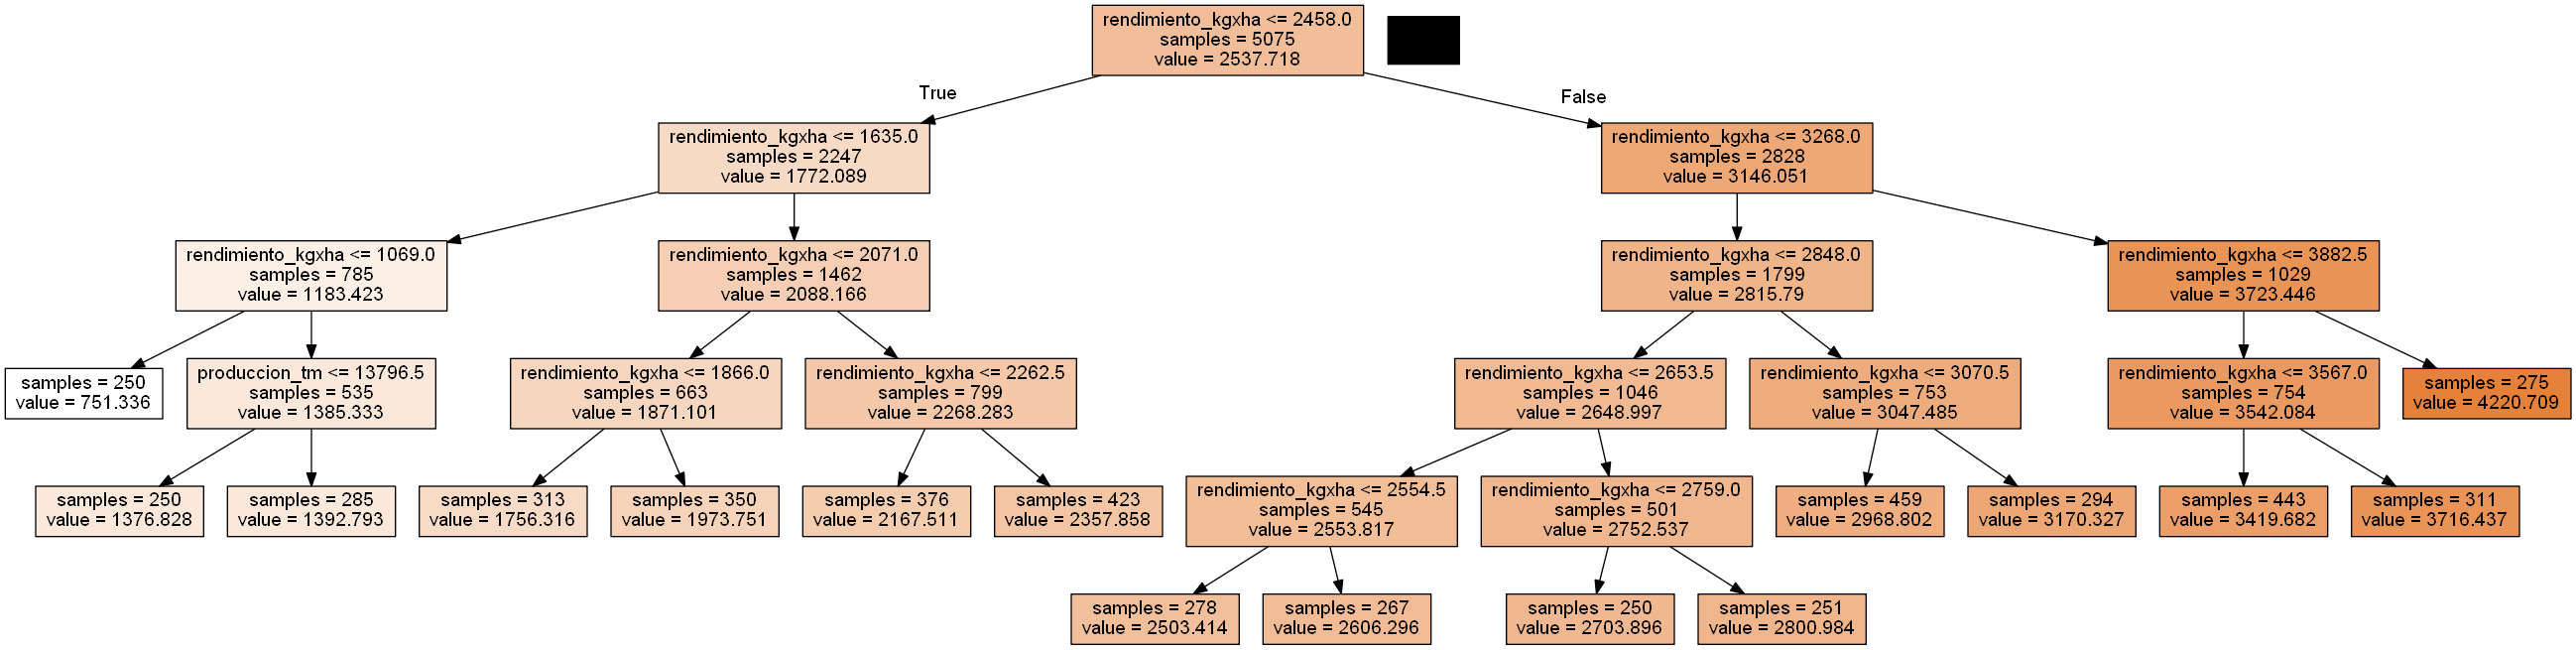

In [387]:
from PIL import Image
im = Image.open("../MisTrabajos/arbol_dot3")
im

* **SAMPLES = N° de muestras usadas**
* **VALUES = N° de prediccion**

* **si RENDIMIENTO_KGxHA los valores bajan de 2458 los resultados estan en la izquierda y si son mayores van hacia la izquierda y ahi veremos sus respectivos resultados tanto de las cosechas y su produccion por tonelada**


Ahora veremos la eficacia del modelo creado con una validacion cruzada

In [400]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [401]:
cv = KFold(n_splits=10 , shuffle=True)
scores = cross_val_score(regtree3, X,Y, scoring="neg_mean_squared_error", cv=cv ,
                       n_jobs=1)

print(scores)
score = np.mean(scores)
print(score)

[-16769.97613917 -12973.12459117 -15711.57535994 -31880.90608346
 -14225.71991461 -13311.31521476 -10995.12129921 -11584.30317791
 -13485.91381451 -12751.84403107]
-15368.97996258122


* tenemos todas y cada una de la scores llevadas a cabor por la validacion del error cuadrado promedio, luego abajo por separado tenemos el GLOBAL:
    * El error promedio puede ser de 15361 Pts hacia arriba y abajo, en la PREDICCION.
    * **El método cross_validation_Predict** que hemos utilizado para hacer la predicción en este caso (cross_validation_score) es un módulo que permite predecir los valores de las variables de salida de las predicciones a partir de un modelo de validación cruzada

In [390]:
list(zip(predictors,regtree3.feature_importances_))

[('superficie_sembrada_ha', 0.0),
 ('superficie_cosechada_ha', 0.0),
 ('produccion_tm', 9.273401709664647e-06),
 ('rendimiento_kgxha', 0.9999907265982904)]

* Vemos que la variable mas importante es la PRODUCCION DE TONELADA POR HECTAREA.

---
---

## implementaremos el RANDOM FOREST para tener un mejor desempeño del modelo y ver como se comporta

In [391]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_jobs=2 , oob_score=True , n_estimators=300)
forest.fit(X,Y)

RandomForestRegressor(n_estimators=300, n_jobs=2, oob_score=True)

In [392]:
subset["rforest_pred"] = forest.oob_prediction_
subset[["rforest_pred" , "rendimiento_kgxha"]]

C:\Users\Acer\AppData\Local\Temp\ipykernel_14804\2979758997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["rforest_pred"] = forest.oob_prediction_


,rforest_pred,rendimiento_kgxha
0,1661.654867,1662
1,1400.000000,1400
2,2806.747664,2806
3,1518.037383,1517
4,1850.482456,1851
...,...,...
5070,2700.978495,2701
5071,2700.981481,2701
5072,2500.000000,2500
5073,2500.000000,2500


* con un simple vistazo podemos observar que tenemos una prediccion muy buena, casi exacta

In [399]:
subset["rforest_error2"] = (subset["rforest_pred"] - subset["rendimiento_kgxha"])**2
sum(subset["rforest_error2"]) / len(subset)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14804\2858613426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["rforest_error2"] = (subset["rforest_pred"] - subset["rendimiento_kgxha"])**2


1040.1526396086515

* Vemos que le resultado del error con el **Random Forest = 1035** y anteriormente con el **DecisionTreeRegressor = 15361**. vemos claramente una mejoria enorme y significativa.
* Usando un solo arbol de regresion y validacion cruzada el error es alto.

In [394]:
forest.oob_score_

0.9985863957283606

* el valor se mide entre -1 y 1, Como podemos ver obtuvimos un valor bastante alto (estos eria la eficacia del **Random Forest**).

In [395]:
list(zip(predictors,forest.feature_importances_))


[('superficie_sembrada_ha', 4.222332916944161e-06),
 ('superficie_cosechada_ha', 6.469704724143732e-05),
 ('produccion_tm', 0.00012489761200347495),
 ('rendimiento_kgxha', 0.9998061830078382)]

* La estimaciones de qué variables son importantes en la clasificación.

### COMO ULTIMO PUNTO PODEMOS OBSERVAR QUE EL MEJOR MODELO PARA PREDECIR ES EL RANDOM FOREST, YA QUE TIENE UNA PREDICCION MUY ALTA Y CASI PERFECTA